# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [5]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [6]:
Y = data['affair']

In [7]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [9]:
model.fit(X_train, Y_train)

LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [10]:
predictions = model.predict_proba(X_test)

In [11]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [12]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [13]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


### Оценка качества модели

Считаем accuracy последней модели

In [14]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [15]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7204188481675393

In [16]:
precision = tp / (tp + fp)
precision

0.5681233933161953

### Используем готовые библиотеки

In [17]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [18]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [19]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.307813319349764, 1.0, 0.048952984822910925)
(0.3074501573976915, 0.9982964224872232, 0.052098191216401434)
(0.30761154855643047, 0.9982964224872232, 0.05253954564169164)
(0.3077731092436975, 0.9982964224872232, 0.05290951843307343)
(0.30793483972674723, 0.9982964224872232, 0.05372856473673886)
(0.30809674027339645, 0.9982964224872232, 0.0541829415169454)
(0.30825881115202525, 0.9982964224872232, 0.05456382031501749)
(0.30842105263157893, 0.9982964224872232, 0.05474131080022561)
(0.30858346498156924, 0.9982964224872232, 0.05545339771530248)
(0.3087460484720759, 0.9982964224872232, 0.057801337752150225)
(0.30890880337374804, 0.9982964224872232, 0.05932824136559894)
(0.3090717299578059, 0.9982964224872232, 0.05936553906912198)
(0.3092348284960422, 0.9982964224872232, 0.06182230453527537)
(0.3093980992608237, 0.9982964224872232, 0.06210531032411884)
(0.30956154252509244, 0.9982964224872232, 0.062440172351967624)
(0.3091966173361522, 0.9965928449744463, 0.0624599269868578)
(0.30936012691

(0.446961894953656, 0.7393526405451448, 0.2787982604697509)
(0.44742268041237115, 0.7393526405451448, 0.27880571854441094)
(0.44788441692466463, 0.7393526405451448, 0.27884463224620476)
(0.44731404958677684, 0.737649063032368, 0.27917604398091755)
(0.44777662874870733, 0.737649063032368, 0.279195687012616)
(0.4472049689440994, 0.7359454855195912, 0.27968210746826966)
(0.44766839378238343, 0.7359454855195912, 0.2803071383778761)
(0.44813278008298757, 0.7359454855195912, 0.28038574699024643)
(0.4485981308411215, 0.7359454855195912, 0.28042495781185606)
(0.4490644490644491, 0.7359454855195912, 0.28067898897186533)
(0.44849115504682624, 0.7342419080068143, 0.28082683227169647)
(0.44895833333333335, 0.7342419080068143, 0.2814035747644798)
(0.4488517745302714, 0.7325383304940375, 0.281650912910379)
(0.44932079414838033, 0.7325383304940375, 0.2824747094600728)
(0.4497907949790795, 0.7325383304940375, 0.28262232892677913)
(0.450261780104712, 0.7325383304940375, 0.2831356634912819)
(0.450733752

(0.6956521739130435, 0.10902896081771721, 0.7480296230977013)
(0.7032967032967034, 0.10902896081771721, 0.7493213982735365)
(0.7, 0.10732538330494037, 0.7524920512031992)
(0.6966292134831461, 0.10562180579216354, 0.754009789402041)
(0.7045454545454546, 0.10562180579216354, 0.7550313317671404)
(0.7011494252873564, 0.10391822827938671, 0.7560228244010901)
(0.6976744186046512, 0.10221465076660988, 0.7563043315324501)
(0.6941176470588235, 0.10051107325383304, 0.7565919777847956)
(0.6904761904761905, 0.09880749574105621, 0.7566671200344782)
(0.6867469879518072, 0.09710391822827939, 0.7584410408798977)
(0.6829268292682927, 0.09540034071550256, 0.7597921156833743)
(0.691358024691358, 0.09540034071550256, 0.7675063385398284)
(0.6875, 0.09369676320272573, 0.7683214801826473)
(0.6962025316455697, 0.09369676320272573, 0.7693481200108314)
(0.7051282051282052, 0.09369676320272573, 0.7702919819207542)
(0.7012987012987013, 0.0919931856899489, 0.7733451080567278)
(0.7066666666666667, 0.090289608177172

In [20]:
from sklearn.metrics import average_precision_score

In [21]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5370782474582139

### ROC

In [22]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [23]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [69]:
for line in zip( fpr, tpr, thres ):
     print( line )

(0.0, 0.0, 1.944558913457266)
(0.0, 0.0017035775127768314, 0.9445589134572661)
(0.0, 0.017035775127768313, 0.8789939369712014)
(0.0007558578987150416, 0.017035775127768313, 0.878647877752076)
(0.0007558578987150416, 0.028960817717206135, 0.8743556661148315)
(0.0022675736961451248, 0.028960817717206135, 0.8701673259472091)
(0.0022675736961451248, 0.034071550255536626, 0.8668201388436825)
(0.003779289493575208, 0.034071550255536626, 0.8579621218139777)
(0.003779289493575208, 0.03577512776831346, 0.8557638746426607)
(0.0045351473922902496, 0.03577512776831346, 0.852329448220423)
(0.0045351473922902496, 0.03747870528109029, 0.8505415400277933)
(0.006046863189720333, 0.03747870528109029, 0.8373703328287185)
(0.006046863189720333, 0.049403747870528106, 0.8283556859902682)
(0.006802721088435374, 0.049403747870528106, 0.8272570844526667)
(0.006802721088435374, 0.05281090289608177, 0.8244237822394321)
(0.007558578987150416, 0.05281090289608177, 0.8228902844497139)
(0.007558578987150416, 0.05451

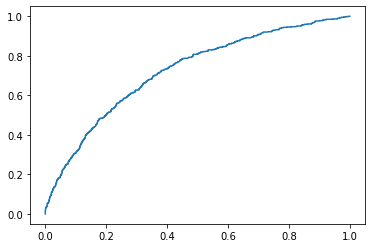

In [39]:
plt.plot(fpr, tpr)

### Домашнее задание, считаем TPR и FPR вручную, строим и сравниваем ROC AUC

In [70]:
predict = model.predict_proba(X_test)
thr_hw = np.linspace(0,1,1000)
tpr_hw = []
fpr_hw = []
print(predict[:, 1])


[0.18408167 0.1373503  0.22922274 ... 0.55916786 0.11058438 0.29031605]


In [74]:
for i in thr_hw:
    for prediction, actual in zip( predict[:, 1], Y_test ):    
        if prediction >= 0.5:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr_hw.append(tp/(tp+fn))
    fpr_hw.append(fp/(fp+tn))

In [73]:
print(fpr_hw)

[0.28785851543491914, 0.28856640955476515, 0.28927289772799775, 0.28997798413898185, 0.2906816729554943, 0.29138396832880564, 0.29208487439376235, 0.2927843952688673, 0.293482535056361, 0.2941792978423015, 0.29487468769664404, 0.2955687086733206, 0.29626136481031834, 0.2969526601297581, 0.29764259863797227, 0.2983311843255821, 0.29901842116757466, 0.29970431312337936, 0.300388864136944, 0.3010720781368103, 0.301753959036189, 0.30243451073303484, 0.30311373711012046, 0.3037916420351106, 0.3044682293606353, 0.3051435029243628, 0.3058174665490725, 0.30649012404272646, 0.30716147919854186, 0.3078315357950616, 0.3085002975962258, 0.30916776835144183, 0.3098339517956545, 0.3104981234626156, 0.3111610166470609, 0.31182263503692076, 0.3124829823059547, 0.31314206211381973, 0.3137998781061375, 0.314456433914562, 0.31511173315684593, 0.3157650568194135, 0.3164171324902666, 0.3170679637419005, 0.3177175541331881, 0.31836590720944463, 0.3190130265024923, 0.3196581970346229, 0.3203021421716307, 0.3

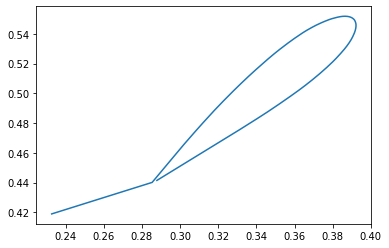

In [75]:
plt.plot(fpr_hw, tpr_hw)

**Построим еще одну модель и сравним их между собой**

In [ ]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

In [ ]:
model2 = LogisticRegression()

In [ ]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [ ]:
model2.fit( X_train_short, Y_train )

In [ ]:
predictions2 = model2.predict_proba( X_test_short )

In [ ]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

In [ ]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score( Y_test, predictions[:, 1] )

In [ ]:
roc_auc_score( Y_test, predictions2[:, 1] )

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc( fpr, tpr )

In [ ]:
auc( fpr2, tpr2 )

## Пример влияния L1 и L2-регуляризации

In [ ]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [ ]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [ ]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [ ]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

In [ ]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [ ]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

In [ ]:
Y = data['affair']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [ ]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [ ]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [ ]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

In [ ]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()